In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost keras
!pip install matplotlib seaborn
!pip install scikit-learn



2024-10-23 07:13:59.023148: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 07:13:59.023786: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 07:13:59.026654: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 07:13:59.034382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 07:13:59.047074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 


Logistic Regression Results
Accuracy: 72.33%
Training and Prediction Time: 0.04 seconds
Confusion Matrix:
[[5362 1626]
 [2248 4764]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000


Naive Bayes Results
Accuracy: 59.33%
Training and Prediction Time: 0.01 seconds
Confusion Matrix:
[[6081  907]
 [4787 2225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.63      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000


XGBoost Results
Accuracy: 73.31%
Traini

/home/ahmedkhalid/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729656967.577137   50570 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-23 07:16:07.739820: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your plat

Epoch 1/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 581us/step - accuracy: 0.5926 - loss: 0.6744 - val_accuracy: 0.6722 - val_loss: 0.6087
Epoch 2/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.6790 - loss: 0.6052 - val_accuracy: 0.7116 - val_loss: 0.5806
Epoch 3/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7138 - loss: 0.5753 - val_accuracy: 0.7228 - val_loss: 0.5715
Epoch 4/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.7224 - loss: 0.5699 - val_accuracy: 0.7299 - val_loss: 0.5690
Epoch 5/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7262 - loss: 0.5648 - val_accuracy: 0.7299 - val_loss: 0.5674
Epoch 6/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.7241 - loss: 0.5674 - val_accuracy: 0.7286 - val_loss: 0.5669
Epoch 7/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7228 - loss: 0.5675 - val_accuracy: 0.7280 - val_loss: 0.5669
Epoch 8/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.7233 -


Neural Network Results
Accuracy: 73.21%

Stacking Ensemble Model Results
Accuracy: 0.737%


/tmp/ipykernel_50570/1183391210.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=algorithms, palette="viridis")


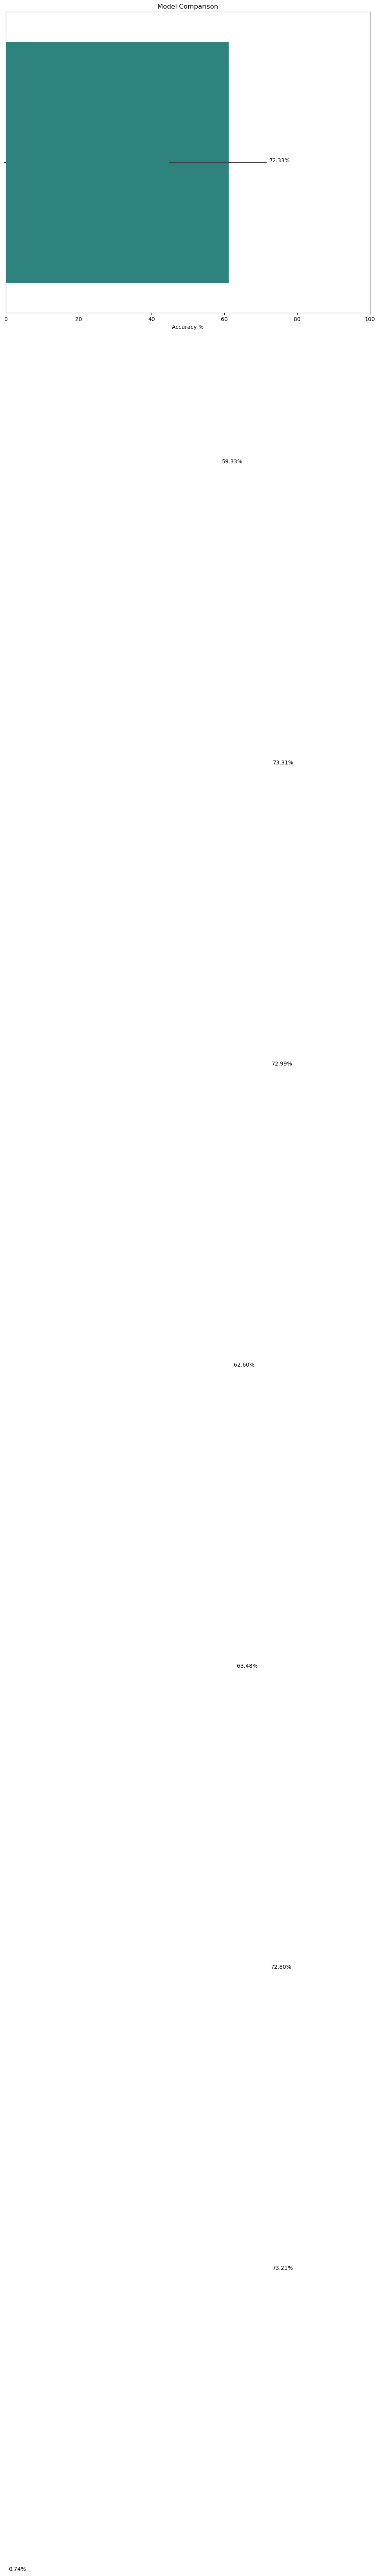

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import time

# Function to evaluate model performance
def evaluate_model(model, X_train, Y_train, X_test, Y_test, algorithm_name):
    start_time = time.time()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    accuracy = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    print(f"\n{algorithm_name} Results")
    print(f"Accuracy: {accuracy}%")
    print(f"Training and Prediction Time: {elapsed_time:.2f} seconds")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    return accuracy  # Return accuracy

# Read and preprocess your dataset
file_path = 'cardio_train.csv'
dataset = pd.read_csv(file_path, delimiter=';')

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dataset.drop('cardio', axis=1))

# Train-test split
predictors = pd.DataFrame(features_scaled, columns=dataset.columns[:-1])
target = dataset["cardio"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Initialize lists for storing scores and algorithms
scores = []
algorithms = []

# Logistic Regression
lr = LogisticRegression(random_state=42)
scores.append(evaluate_model(lr, X_train, Y_train, X_test, Y_test, "Logistic Regression"))
joblib.dump(lr, 'logistic_regression.pkl')  # Save model

# Naive Bayes
nb = GaussianNB()
scores.append(evaluate_model(nb, X_train, Y_train, X_test, Y_test, "Naive Bayes"))
joblib.dump(nb, 'naive_bayes.pkl')  # Save model

# XGBoost
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
scores.append(evaluate_model(xgb_model, X_train, Y_train, X_test, Y_test, "XGBoost"))
joblib.dump(xgb_model, 'xgboost.pkl')  # Save model

# Support Vector Machine
sv = svm.SVC()
scores.append(evaluate_model(sv, X_train, Y_train, X_test, Y_test, "SVM"))
joblib.dump(sv, 'svm.pkl')  # Save model

# K-Nearest Neighbors
knn = KNeighborsClassifier()
scores.append(evaluate_model(knn, X_train, Y_train, X_test, Y_test, "KNN"))
joblib.dump(knn, 'knn.pkl')  # Save model

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
scores.append(evaluate_model(dt, X_train, Y_train, X_test, Y_test, "Decision Tree"))
joblib.dump(dt, 'decision_tree.pkl')  # Save model

# Random Forest
rf = RandomForestClassifier(random_state=42)
scores.append(evaluate_model(rf, X_train, Y_train, X_test, Y_test, "Random Forest"))
joblib.dump(rf, 'random_forest.pkl')  # Save model

# Neural Network
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Neural Network
history = model.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test), callbacks=[early_stopping], verbose=1)
Y_pred_nn = (model.predict(X_test) > 0.5).astype(int).reshape(-1)
score_nn = round(accuracy_score(Y_pred_nn, Y_test) * 100, 2)
print(f"\nNeural Network Results\nAccuracy: {score_nn}%")
scores.append(score_nn)

# Save the Neural Network model
model.save('neural_network.h5')

# Stacking Ensemble
base_models = [
    ('lr', lr),
    ('svm', sv),
    ('rf', rf),
    ('xgb', xgb_model)
]
final_estimator = LogisticRegression()
stack_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)
stack_model.fit(X_train, Y_train)
stack_pred = stack_model.predict(X_test)
stack_accuracy = accuracy_score(Y_test, stack_pred)

print(f"\nStacking Ensemble Model Results")
print(f"Accuracy: {stack_accuracy}%")
scores.append(stack_accuracy)

# Save the Stacking Model
joblib.dump(stack_model, 'stacking_model.pkl')  # Save model

# Plotting Model Comparisons
plt.figure(figsize=(12, 10))
sns.barplot(x=scores, y=algorithms, palette="viridis")

# Adding annotations to each bar for displaying the accuracy in percentage
for index, value in enumerate(scores):
    plt.text(value, index, f'{value:.2f}%')

plt.xlabel('Accuracy %')
plt.title('Model Comparison')
plt.xlim(0, 100)  # Accuracy scores are in percentage
plt.show()

In [3]:
df = pd.read_csv('cardio_train.csv', delimiter=';')
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [4]:
import joblib
scaler = joblib.load('scaler.pkl')
print(scaler.feature_names_in_) 

['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active']
